In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from scipy.optimize import curve_fit
import datetime

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('ggplot')

1. clean data
2. curve fitting
3. output result

In [5]:
def clean_data(path, output_name, is_saving=True):
    """
    Implements:
        clean data, 2d --> 1d
    Arguments:
        path -- {str} data file path
    Returns:
        save 1d data
    """
    data = pd.read_excel(path, header=0, index_col=None).stack().droplevel(0).dropna()
    if is_saving:
        data.to_csv(output_name)
    return data

In [6]:
data = clean_data('data/data01.xls', 'none', is_saving=False)

In [7]:
data.head()

1    1.0000
2    0.2278
1    1.0000
2    0.1870
3    0.1116
dtype: float64

In [8]:
data.shape

(76,)

In [10]:
# define model function
def func(x, a, b, c, d):  
    return a * np.exp(b * x) + c * np.exp(d * x)

using matlab fitting result directly

In [9]:
params = pd.read_excel('data/fit_data.xlsx', header=None, index_col=None).values.tolist()[0]

In [11]:
x = np.array(data.index.tolist())
y = np.array(data.values.tolist())

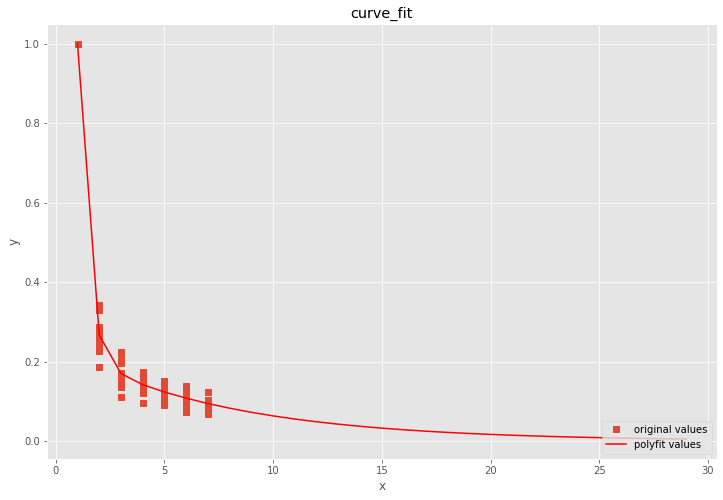

In [12]:
xvals = np.array(range(1, 30))
yvals = func(xvals, *params) #拟合y值
plot1 = plt.plot(x, y, 's',label='original values')  
plot2 = plt.plot(xvals, yvals, 'r',label='polyfit values')  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc=4) #指定legend的位置右下角  
plt.title('curve_fit')
plt.show();

In [ ]:
res = [func(i, a, b, c, d) for i in range(405,0,-1)]
res2 = [func(i, a, b, c, d) for i in range(1,406)]
df_res = pd.DataFrame({'ascending':res, 'descending':res2})
output = 'data/res_' + datetime.date.today().strftime('%y%m%d') + '.csv'
df_res.to_csv(output)